In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

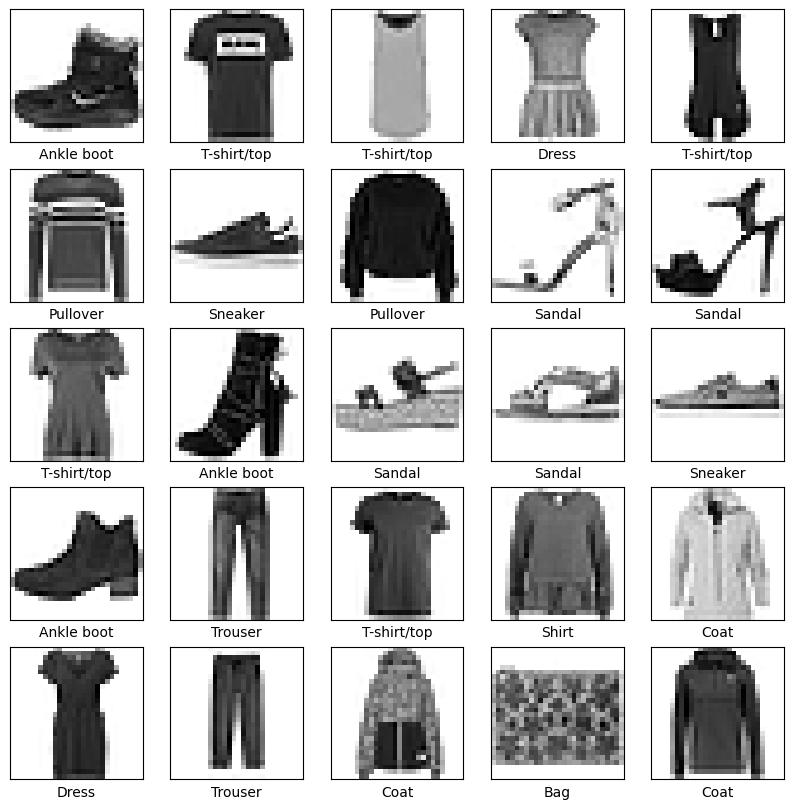

In [6]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten    
model = Sequential()     
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (

In [8]:
model.fit(train_images.astype(np.float32), train_labels.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5180 - accuracy: 0.8194 - val_loss: 0.4302 - val_accuracy: 0.8457
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3863 - accuracy: 0.8611 - val_loss: 0.3632 - val_accuracy: 0.8700
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3458 - accuracy: 0.8746 - val_loss: 0.3679 - val_accuracy: 0.8673
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3186 - accuracy: 0.8845 - val_loss: 0.3522 - val_accuracy: 0.8725
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3028 - accuracy: 0.8891 - val_loss: 0.3423 - val_accuracy: 0.8767


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 1s - loss: 0.3730 - accuracy: 0.8679 - 863ms/epoch - 3ms/step

 Test accuracy =  0.867900013923645


In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

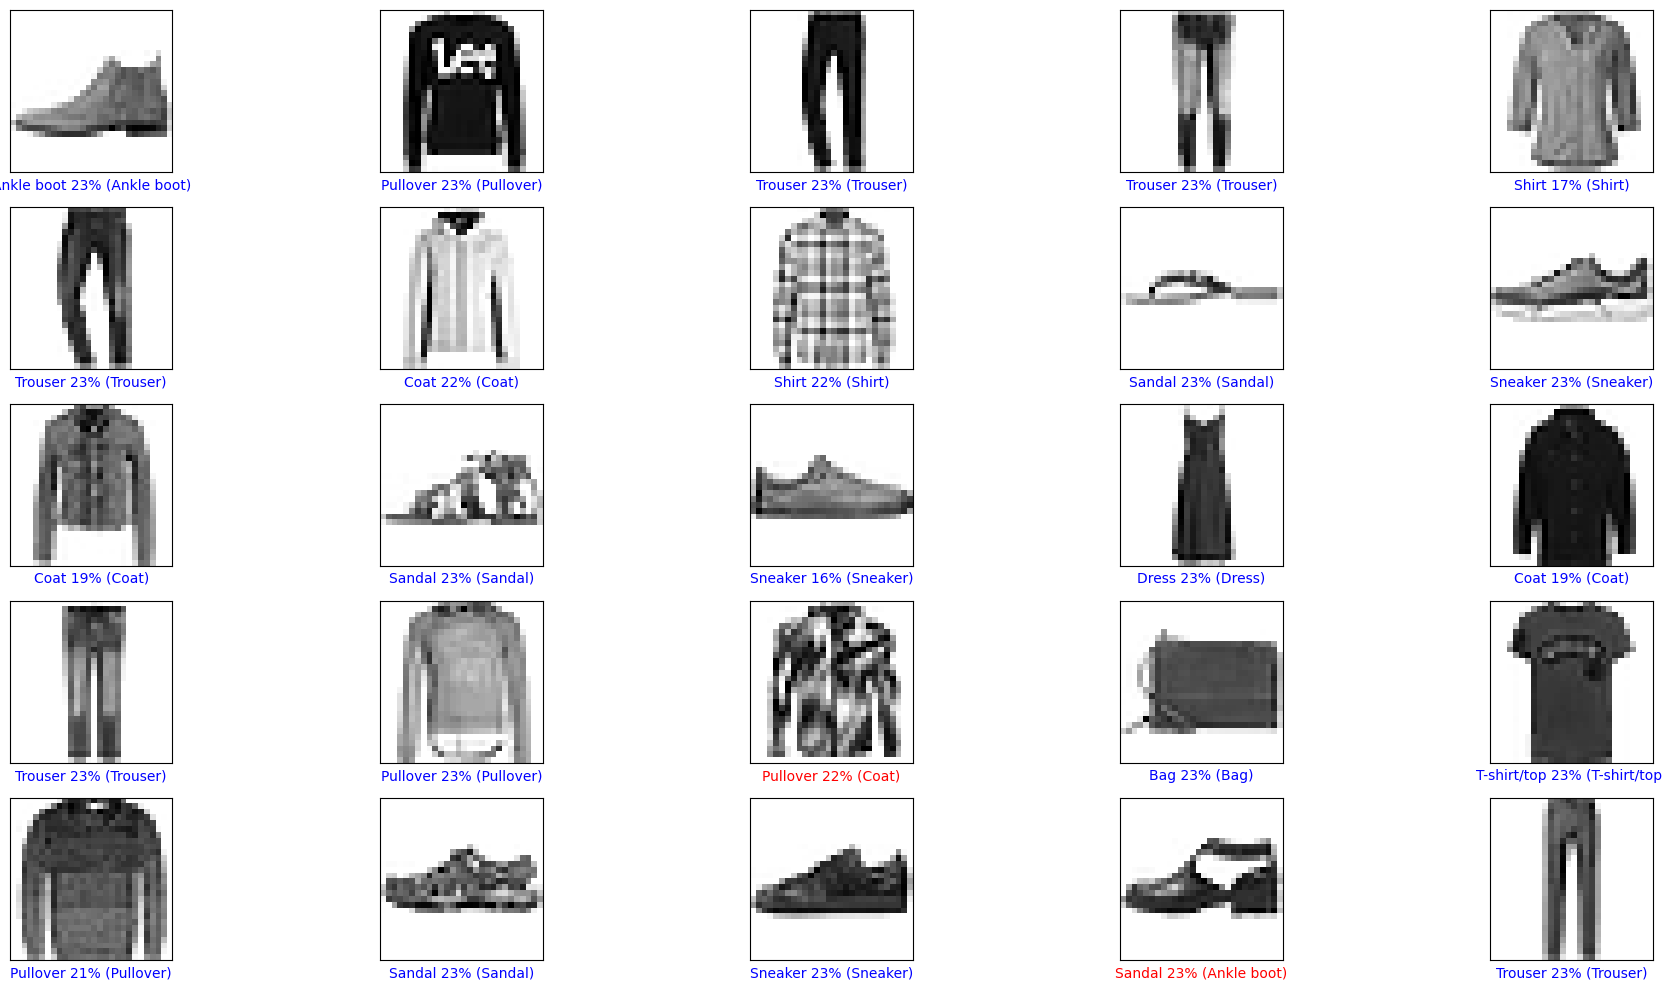

In [14]:
rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()